<a href="https://colab.research.google.com/github/shaye440/colab_demo/blob/master/modelForCompetition_imp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://awscdn.datafountain.cn/cometition_data2/Files/PengCheng2020/RSImage/baseline.zip

--2020-09-20 01:15:34--  https://awscdn.datafountain.cn/cometition_data2/Files/PengCheng2020/RSImage/baseline.zip
Resolving awscdn.datafountain.cn (awscdn.datafountain.cn)... 118.193.97.222, 118.193.97.206, 118.193.97.223, ...
Connecting to awscdn.datafountain.cn (awscdn.datafountain.cn)|118.193.97.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18872584 (18M) [application/zip]
Saving to: ‘baseline.zip’

baseline.zip        100%[===================>]  18.00M  1.17MB/s    in 17s     

2020-09-20 01:15:54 (1.03 MB/s) - ‘baseline.zip’ saved [18872584/18872584]



In [ ]:
!unzip 'baseline.zip'

Archive:  baseline.zip
   creating: baseline/
  inflating: baseline/dataloader.py  
  inflating: baseline/model.py       
  inflating: baseline/predict.py     
  inflating: baseline/README.md      
   creating: baseline/test/
   creating: baseline/test/images/
  inflating: baseline/test/images/1_1_0.tif  
  inflating: baseline/test/images/1_1_1.tif  
  inflating: baseline/test/images/1_1_2.tif  
  inflating: baseline/test/images/1_1_3.tif  
  inflating: baseline/test/images/1_2_0.tif  
  inflating: baseline/test/images/1_2_1.tif  
  inflating: baseline/test/images/1_2_2.tif  
  inflating: baseline/test/images/1_2_3.tif  
  inflating: baseline/test/images/1_3_0.tif  
  inflating: baseline/test/images/1_3_1.tif  
   creating: baseline/test/labels/
  inflating: baseline/test/labels/1_1_0.png  
  inflating: baseline/test/labels/1_1_1.png  
  inflating: baseline/test/labels/1_1_2.png  
  inflating: baseline/test/labels/1_1_3.png  
  inflating: baseline/test/labels/1_2_0.png  
  inflating: b

In [ ]:
from matplotlib import pyplot as plt
x = Image.open('/content/baseline/train/labels/1_3_2.png')
transform = transforms.Compose([
            transforms.ToTensor()
        ])
x = transform(x)
#plt.imshow(x)
print(x)
#x = numpy.array( x)
print(x.shape)
print(x)
#print(x[0,0,:])

tensor([[[400, 400, 400,  ..., 400, 400, 400],
         [400, 400, 400,  ..., 400, 400, 400],
         [400, 400, 400,  ..., 400, 400, 400],
         ...,
         [400, 400, 400,  ..., 300, 300, 300],
         [400, 400, 400,  ..., 300, 300, 300],
         [400, 400, 400,  ..., 300, 300, 300]]], dtype=torch.int32)
torch.Size([1, 256, 256])
tensor([[[400, 400, 400,  ..., 400, 400, 400],
         [400, 400, 400,  ..., 400, 400, 400],
         [400, 400, 400,  ..., 400, 400, 400],
         ...,
         [400, 400, 400,  ..., 300, 300, 300],
         [400, 400, 400,  ..., 300, 300, 300],
         [400, 400, 400,  ..., 300, 300, 300]]], dtype=torch.int32)


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional.py:70: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img = torch.from_numpy(np.array(pic, np.int32, copy=False))


In [ ]:
from matplotlib import pyplot as plt
import skimage.io as io
from torch.utils.data import Dataset
from PIL import Image
import numpy

#root = '/content/baseline/train'

class RSDataset(Dataset):
  def __init__(self, root, transforms, ch):
    super(RSDataset,self).__init__()
    self.root = root
    self.transforms = transforms
    self.listFiles = []
    #my_files = os.listdir("/content/baseline/train")
    #print(my_files)
    if ch == 0:
      imgs_root = os.listdir("/content/baseline/train/images")
      labels_root = os.listdir("/content/baseline/train/labels")
    else:
      imgs_root = os.listdir("/content/baseline/test/images")
      labels_root = os.listdir("/content/baseline/test/labels")
    for files in imgs_root:
      if "tif" in files:
          self.listFiles.append([self.root + '/images/' + files, self.root + '/labels/' + files[:-4]+'.png'])
    #print(self.listFiles)
  def __getitem__(self,index):
    x = Image.open(self.listFiles[index][0])
    x = numpy.array(x)
    x = self.transforms(x)
    y = Image.open(self.listFiles[index][1])
    y = numpy.array(y)
    y = self.transforms(y)
    return x, y
    
  def __len__(self):
    return len(self.listFiles)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fca9258e898>,
 (-0.5, 255.5, 255.5, -0.5))

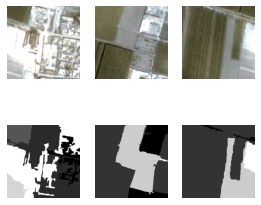

In [ ]:
import os
import torch
from  torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

transform = transforms.Compose([
            transforms.ToTensor()
        ])

dataset = RSDataset('/content/baseline/train',transforms=transform, ch=0)
dataset_test = RSDataset('/content/baseline/test',transforms=transform,ch=1)

#dataset = ImageFolder('/content/data/dogcat_2',transform=transform)

dataloader = DataLoader(dataset,batch_size=3,shuffle=True,num_workers=1,drop_last=False)
dataloader_test = DataLoader(dataset_test,batch_size=3,shuffle=True,num_workers=1,drop_last=False)

dataiter = iter(dataloader)
imgs = next(dataiter)
imgs0 = imgs[0]
imgs1 = imgs[1]
imgs0 = imgs0.permute(0, 2, 3, 1)
imgs1 = imgs1.permute(0, 2, 3, 1)



plt.subplot(241),plt.imshow(imgs0[0]),plt.axis('off')
plt.subplot(242),plt.imshow(imgs0[1]),plt.axis('off')
plt.subplot(243),plt.imshow(imgs0[2]),plt.axis('off')
#plt.subplot(244),plt.imshow(imgs0[3]),plt.axis('off')

plt.subplot(245),plt.imshow(imgs1[0][:,:,0],cmap='gray'),plt.axis('off')
plt.subplot(246),plt.imshow(imgs1[1][:,:,0],cmap='gray'),plt.axis('off')
plt.subplot(247),plt.imshow(imgs1[2][:,:,0],cmap='gray'),plt.axis('off')
#plt.subplot(248),plt.imshow(imgs1[3][:,:,0],cmap='gray'),plt.axis('off')




In [ ]:
import torch
import torch.nn as nn
import torch.functional as F

class UNet(nn.Module):
    def __init__(self, input_nc, output_nc):
        super(UNet, self).__init__()
        self.in_conv1 = nn.Conv2d(input_nc, 64, kernel_size=3, stride=1, padding=1)
        self.in_conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        self.pooling1 = nn.MaxPool2d(2)
        self.conv1_1 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv1_2 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)

        self.pooling2 = nn.MaxPool2d(2)
        self.conv2_1 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv2_2 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)

        self.pooling3 = nn.MaxPool2d(2)
        self.conv3_1 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        self.conv3_2 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)

        self.pooling4 = nn.MaxPool2d(2)
        self.conv4_1 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1)

        self.upsampling1 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv5_1 = nn.Conv2d(1024, 256, kernel_size=3, stride=1, padding=1)
        self.conv5_2 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)

        self.upsampling2 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv6_1 = nn.Conv2d(512, 128, kernel_size=3, stride=1, padding=1)
        self.conv6_2 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)

        self.upsampling3 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv7_1 = nn.Conv2d(256, 64, kernel_size=3, stride=1, padding=1)
        self.conv7_2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        self.upsampling4 = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.conv8_1 = nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1)
        self.conv8_2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)

        self.out_conv = nn.Conv2d(64, output_nc, kernel_size=1, stride=1, padding=0)

        self.bn64 = nn.BatchNorm2d(64)
        self.bn128 = nn.BatchNorm2d(128)
        self.bn256 = nn.BatchNorm2d(256)
        self.bn512 = nn.BatchNorm2d(512)

        self.relu = nn.ReLU(inplace=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input):
        c1 = self.relu(self.bn64(self.in_conv1(input)))
        c2 = self.relu(self.bn64(self.in_conv2(c1)))

        e1_ = self.relu(self.bn128(self.conv1_1(self.pooling1(c2))))
        e1 = self.relu(self.bn128(self.conv1_2(e1_)))

        e2_ = self.relu(self.bn256(self.conv2_1(self.pooling1(e1))))
        e2 = self.relu(self.bn256(self.conv2_2(e2_)))

        e3_ = self.relu(self.bn512(self.conv3_1(self.pooling1(e2))))
        e3 = self.relu(self.bn512(self.conv3_2(e3_)))

        e4_ = self.relu(self.bn512(self.conv4_1(self.pooling1(e3))))
        e4 = self.relu(self.bn512(self.conv4_2(e4_)))

        d1_1 = self.upsampling1(e4)
        d1_2 = torch.cat([d1_1, e3], dim=1)
        d1_ = self.relu(self.bn256(self.conv5_1(d1_2)))
        d1 = self.relu(self.bn256(self.conv5_2(d1_)))

        d2_1 = self.upsampling1(d1)
        d2_2 = torch.cat([d2_1, e2], dim=1)
        d2_ = self.relu(self.bn128(self.conv6_1(d2_2)))
        d2 = self.relu(self.bn128(self.conv6_2(d2_)))

        d3_1 = self.upsampling1(d2)
        d3_2 = torch.cat([d3_1, e1], dim=1)
        d3_ = self.relu(self.bn64(self.conv7_1(d3_2)))
        d3 = self.relu(self.bn64(self.conv7_2(d3_)))

        d4_1 = self.upsampling1(d3)
        d4_2 = torch.cat([d4_1, c2], dim=1)
        d4_ = self.relu(self.bn64(self.conv8_1(d4_2)))
        d4 = self.relu(self.bn64(self.conv8_2(d4_)))

        output = self.sigmoid(self.out_conv(d4))

        return output


In [ ]:
import torch

net = UNet(3,1)

ce_loss = nn.BCELoss()
#ce_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr = 0.001)

epoch = 5
batch_size = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)
net.train()
for epoch in range(1,100+1):
  for batch_idx, (data, targets ) in enumerate(dataloader):
          data = data.to(device)
          targets = targets.to(device)
          optimizer.zero_grad()
          output = net(data)
          output = output.view(-1).float()
          targets = targets.view(-1).float()
          loss = ce_loss(output,targets)
          loss.backward()
          optimizer.step()
          
          print('Train Epoch: {} batch:{}\tLoss: {:.6f}'.format(
              epoch, batch_idx , loss.item()))
          

cuda
Train Epoch: 1 batch:0	Loss: 48.097809
Train Epoch: 1 batch:1	Loss: -10.931404
Train Epoch: 1 batch:2	Loss: -63.677685
Train Epoch: 1 batch:3	Loss: -116.780602
Train Epoch: 2 batch:0	Loss: -201.378845
Train Epoch: 2 batch:1	Loss: -317.429382
Train Epoch: 2 batch:2	Loss: -287.599762
Train Epoch: 2 batch:3	Loss: -324.068420
Train Epoch: 3 batch:0	Loss: -346.884583
Train Epoch: 3 batch:1	Loss: -333.534912
Train Epoch: 3 batch:2	Loss: -323.889496
Train Epoch: 3 batch:3	Loss: -369.497040
Train Epoch: 4 batch:0	Loss: -420.399109
Train Epoch: 4 batch:1	Loss: -352.704285
Train Epoch: 4 batch:2	Loss: -368.995605
Train Epoch: 4 batch:3	Loss: -372.129120
Train Epoch: 5 batch:0	Loss: -412.003510
Train Epoch: 5 batch:1	Loss: -396.396088
Train Epoch: 5 batch:2	Loss: -522.402222
Train Epoch: 5 batch:3	Loss: -501.668213
Train Epoch: 6 batch:0	Loss: -490.847595
Train Epoch: 6 batch:1	Loss: -516.139404
Train Epoch: 6 batch:2	Loss: -513.886475


KeyboardInterrupt: ignored

tensor([[[0.5754],
         [0.5656],
         [0.5622],
         ...,
         [0.5660],
         [0.5750],
         [0.5864]],

        [[0.5555],
         [0.5362],
         [0.5247],
         ...,
         [0.5286],
         [0.5437],
         [0.5716]],

        [[0.5527],
         [0.5265],
         [0.5122],
         ...,
         [0.5172],
         [0.5346],
         [0.5679]],

        ...,

        [[0.5536],
         [0.5251],
         [0.5110],
         ...,
         [0.5169],
         [0.5346],
         [0.5673]],

        [[0.5600],
         [0.5351],
         [0.5248],
         ...,
         [0.5291],
         [0.5416],
         [0.5667]],

        [[0.5745],
         [0.5601],
         [0.5561],
         ...,
         [0.5581],
         [0.5619],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [

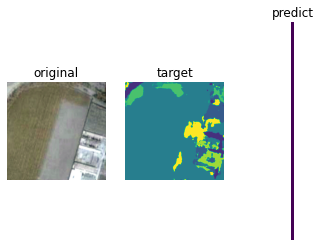

Train Epoch: 1 batch:0	Loss: -39.298901
tensor([[[0.5752],
         [0.5655],
         [0.5621],
         ...,
         [0.5655],
         [0.5746],
         [0.5861]],

        [[0.5554],
         [0.5363],
         [0.5249],
         ...,
         [0.5286],
         [0.5436],
         [0.5714]],

        [[0.5527],
         [0.5268],
         [0.5125],
         ...,
         [0.5176],
         [0.5346],
         [0.5678]],

        ...,

        [[0.5536],
         [0.5257],
         [0.5114],
         ...,
         [0.5169],
         [0.5345],
         [0.5676]],

        [[0.5595],
         [0.5355],
         [0.5252],
         ...,
         [0.5292],
         [0.5417],
         [0.5670]],

        [[0.5742],
         [0.5605],
         [0.5565],
         ...,
         [0.5580],
         [0.5619],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

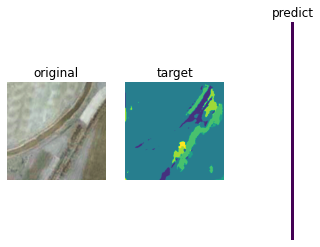

Train Epoch: 1 batch:1	Loss: -39.114834
tensor([[[0.5757],
         [0.5658],
         [0.5623],
         ...,
         [0.5670],
         [0.5758],
         [0.5874]],

        [[0.5557],
         [0.5361],
         [0.5245],
         ...,
         [0.5290],
         [0.5443],
         [0.5729]],

        [[0.5528],
         [0.5262],
         [0.5120],
         ...,
         [0.5173],
         [0.5348],
         [0.5693]],

        ...,

        [[0.5536],
         [0.5260],
         [0.5116],
         ...,
         [0.5169],
         [0.5345],
         [0.5677]],

        [[0.5595],
         [0.5357],
         [0.5253],
         ...,
         [0.5294],
         [0.5417],
         [0.5671]],

        [[0.5742],
         [0.5606],
         [0.5567],
         ...,
         [0.5580],
         [0.5618],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

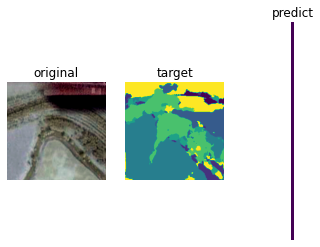

Train Epoch: 1 batch:2	Loss: -42.555939
tensor([[[0.5771],
         [0.5661],
         [0.5633],
         ...,
         [0.5660],
         [0.5750],
         [0.5864]],

        [[0.5570],
         [0.5352],
         [0.5249],
         ...,
         [0.5285],
         [0.5437],
         [0.5716]],

        [[0.5541],
         [0.5254],
         [0.5125],
         ...,
         [0.5172],
         [0.5346],
         [0.5680]],

        ...,

        [[0.5537],
         [0.5251],
         [0.5110],
         ...,
         [0.5173],
         [0.5349],
         [0.5674]],

        [[0.5601],
         [0.5352],
         [0.5250],
         ...,
         [0.5293],
         [0.5418],
         [0.5668]],

        [[0.5746],
         [0.5601],
         [0.5561],
         ...,
         [0.5583],
         [0.5621],
         [0.5778]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([1, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

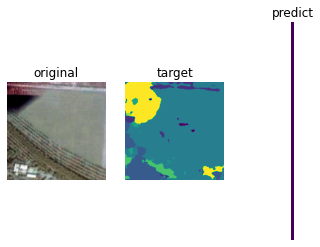

Train Epoch: 1 batch:3	Loss: -42.532619
tensor([[[0.5755],
         [0.5657],
         [0.5623],
         ...,
         [0.5666],
         [0.5755],
         [0.5869]],

        [[0.5556],
         [0.5362],
         [0.5247],
         ...,
         [0.5287],
         [0.5439],
         [0.5721]],

        [[0.5527],
         [0.5264],
         [0.5121],
         ...,
         [0.5170],
         [0.5345],
         [0.5684]],

        ...,

        [[0.5536],
         [0.5262],
         [0.5119],
         ...,
         [0.5170],
         [0.5347],
         [0.5675]],

        [[0.5594],
         [0.5359],
         [0.5255],
         ...,
         [0.5292],
         [0.5417],
         [0.5668]],

        [[0.5741],
         [0.5608],
         [0.5570],
         ...,
         [0.5581],
         [0.5620],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

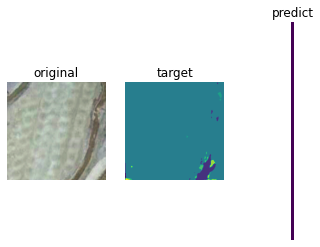

Train Epoch: 2 batch:0	Loss: -38.762329
tensor([[[0.5757],
         [0.5658],
         [0.5623],
         ...,
         [0.5658],
         [0.5748],
         [0.5863]],

        [[0.5557],
         [0.5361],
         [0.5245],
         ...,
         [0.5286],
         [0.5437],
         [0.5714]],

        [[0.5528],
         [0.5261],
         [0.5119],
         ...,
         [0.5173],
         [0.5346],
         [0.5678]],

        ...,

        [[0.5536],
         [0.5261],
         [0.5119],
         ...,
         [0.5169],
         [0.5346],
         [0.5675]],

        [[0.5594],
         [0.5359],
         [0.5256],
         ...,
         [0.5291],
         [0.5416],
         [0.5668]],

        [[0.5742],
         [0.5608],
         [0.5570],
         ...,
         [0.5581],
         [0.5619],
         [0.5778]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

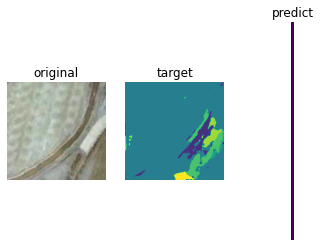

Train Epoch: 2 batch:1	Loss: -40.128464
tensor([[[0.5765],
         [0.5662],
         [0.5629],
         ...,
         [0.5653],
         [0.5744],
         [0.5860]],

        [[0.5563],
         [0.5356],
         [0.5246],
         ...,
         [0.5286],
         [0.5435],
         [0.5714]],

        [[0.5534],
         [0.5255],
         [0.5122],
         ...,
         [0.5178],
         [0.5346],
         [0.5678]],

        ...,

        [[0.5535],
         [0.5260],
         [0.5116],
         ...,
         [0.5174],
         [0.5349],
         [0.5674]],

        [[0.5594],
         [0.5357],
         [0.5253],
         ...,
         [0.5293],
         [0.5418],
         [0.5667]],

        [[0.5742],
         [0.5606],
         [0.5567],
         ...,
         [0.5585],
         [0.5623],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

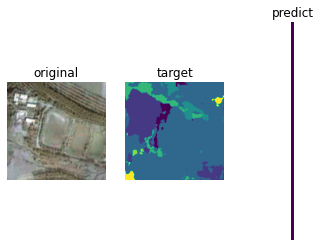

Train Epoch: 2 batch:2	Loss: -39.815369
tensor([[[0.5757],
         [0.5658],
         [0.5623],
         ...,
         [0.5670],
         [0.5758],
         [0.5874]],

        [[0.5557],
         [0.5361],
         [0.5245],
         ...,
         [0.5290],
         [0.5443],
         [0.5729]],

        [[0.5528],
         [0.5262],
         [0.5120],
         ...,
         [0.5173],
         [0.5348],
         [0.5693]],

        ...,

        [[0.5536],
         [0.5260],
         [0.5116],
         ...,
         [0.5169],
         [0.5345],
         [0.5677]],

        [[0.5595],
         [0.5357],
         [0.5253],
         ...,
         [0.5294],
         [0.5417],
         [0.5671]],

        [[0.5742],
         [0.5606],
         [0.5567],
         ...,
         [0.5580],
         [0.5618],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([1, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

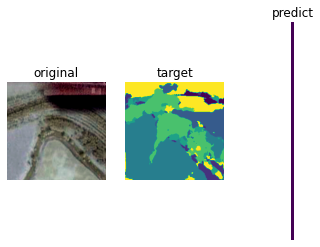

Train Epoch: 2 batch:3	Loss: -49.323151
tensor([[[0.5765],
         [0.5662],
         [0.5629],
         ...,
         [0.5653],
         [0.5744],
         [0.5860]],

        [[0.5563],
         [0.5356],
         [0.5246],
         ...,
         [0.5286],
         [0.5435],
         [0.5714]],

        [[0.5534],
         [0.5255],
         [0.5122],
         ...,
         [0.5178],
         [0.5346],
         [0.5678]],

        ...,

        [[0.5535],
         [0.5260],
         [0.5116],
         ...,
         [0.5174],
         [0.5349],
         [0.5674]],

        [[0.5594],
         [0.5357],
         [0.5253],
         ...,
         [0.5293],
         [0.5418],
         [0.5667]],

        [[0.5742],
         [0.5606],
         [0.5567],
         ...,
         [0.5585],
         [0.5623],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

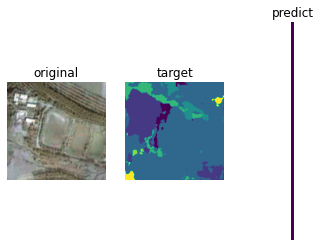

Train Epoch: 3 batch:0	Loss: -40.032757
tensor([[[0.5757],
         [0.5658],
         [0.5623],
         ...,
         [0.5658],
         [0.5748],
         [0.5863]],

        [[0.5557],
         [0.5361],
         [0.5245],
         ...,
         [0.5286],
         [0.5437],
         [0.5714]],

        [[0.5528],
         [0.5261],
         [0.5119],
         ...,
         [0.5173],
         [0.5346],
         [0.5678]],

        ...,

        [[0.5536],
         [0.5261],
         [0.5119],
         ...,
         [0.5169],
         [0.5346],
         [0.5675]],

        [[0.5594],
         [0.5359],
         [0.5256],
         ...,
         [0.5291],
         [0.5416],
         [0.5668]],

        [[0.5742],
         [0.5608],
         [0.5570],
         ...,
         [0.5581],
         [0.5619],
         [0.5778]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

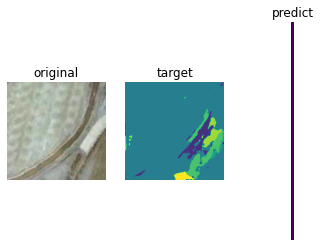

Train Epoch: 3 batch:1	Loss: -38.751640
tensor([[[0.5754],
         [0.5656],
         [0.5622],
         ...,
         [0.5660],
         [0.5750],
         [0.5864]],

        [[0.5555],
         [0.5362],
         [0.5247],
         ...,
         [0.5286],
         [0.5437],
         [0.5716]],

        [[0.5527],
         [0.5265],
         [0.5122],
         ...,
         [0.5172],
         [0.5346],
         [0.5679]],

        ...,

        [[0.5536],
         [0.5251],
         [0.5110],
         ...,
         [0.5169],
         [0.5346],
         [0.5673]],

        [[0.5600],
         [0.5351],
         [0.5248],
         ...,
         [0.5291],
         [0.5416],
         [0.5667]],

        [[0.5745],
         [0.5601],
         [0.5561],
         ...,
         [0.5581],
         [0.5619],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

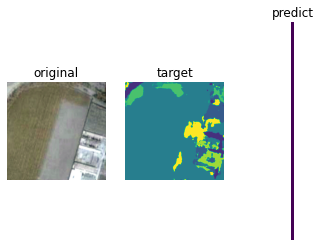

Train Epoch: 3 batch:2	Loss: -39.921772
tensor([[[0.5757],
         [0.5658],
         [0.5623],
         ...,
         [0.5670],
         [0.5758],
         [0.5874]],

        [[0.5557],
         [0.5361],
         [0.5245],
         ...,
         [0.5290],
         [0.5443],
         [0.5729]],

        [[0.5528],
         [0.5262],
         [0.5120],
         ...,
         [0.5173],
         [0.5348],
         [0.5693]],

        ...,

        [[0.5536],
         [0.5260],
         [0.5116],
         ...,
         [0.5169],
         [0.5345],
         [0.5677]],

        [[0.5595],
         [0.5357],
         [0.5253],
         ...,
         [0.5294],
         [0.5417],
         [0.5671]],

        [[0.5742],
         [0.5606],
         [0.5567],
         ...,
         [0.5580],
         [0.5618],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([1, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

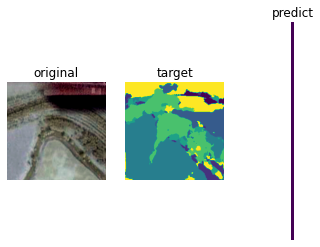

Train Epoch: 3 batch:3	Loss: -49.323151
tensor([[[0.5764],
         [0.5661],
         [0.5627],
         ...,
         [0.5663],
         [0.5752],
         [0.5866]],

        [[0.5563],
         [0.5356],
         [0.5244],
         ...,
         [0.5287],
         [0.5438],
         [0.5717]],

        [[0.5533],
         [0.5254],
         [0.5120],
         ...,
         [0.5172],
         [0.5346],
         [0.5681]],

        ...,

        [[0.5537],
         [0.5253],
         [0.5112],
         ...,
         [0.5170],
         [0.5345],
         [0.5676]],

        [[0.5599],
         [0.5352],
         [0.5249],
         ...,
         [0.5291],
         [0.5415],
         [0.5669]],

        [[0.5744],
         [0.5602],
         [0.5562],
         ...,
         [0.5580],
         [0.5618],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

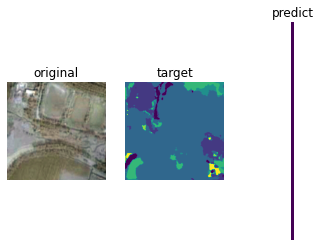

Train Epoch: 4 batch:0	Loss: -40.292431
tensor([[[0.5755],
         [0.5657],
         [0.5623],
         ...,
         [0.5668],
         [0.5757],
         [0.5870]],

        [[0.5556],
         [0.5362],
         [0.5247],
         ...,
         [0.5290],
         [0.5442],
         [0.5723]],

        [[0.5528],
         [0.5264],
         [0.5121],
         ...,
         [0.5173],
         [0.5348],
         [0.5686]],

        ...,

        [[0.5536],
         [0.5263],
         [0.5121],
         ...,
         [0.5174],
         [0.5348],
         [0.5674]],

        [[0.5593],
         [0.5359],
         [0.5257],
         ...,
         [0.5292],
         [0.5417],
         [0.5667]],

        [[0.5741],
         [0.5609],
         [0.5571],
         ...,
         [0.5586],
         [0.5624],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

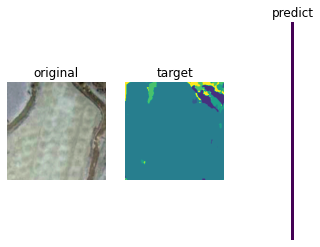

Train Epoch: 4 batch:1	Loss: -38.655930
tensor([[[0.5757],
         [0.5658],
         [0.5623],
         ...,
         [0.5670],
         [0.5758],
         [0.5874]],

        [[0.5557],
         [0.5361],
         [0.5245],
         ...,
         [0.5290],
         [0.5443],
         [0.5729]],

        [[0.5528],
         [0.5262],
         [0.5120],
         ...,
         [0.5173],
         [0.5348],
         [0.5693]],

        ...,

        [[0.5536],
         [0.5260],
         [0.5116],
         ...,
         [0.5169],
         [0.5345],
         [0.5677]],

        [[0.5595],
         [0.5357],
         [0.5253],
         ...,
         [0.5294],
         [0.5417],
         [0.5671]],

        [[0.5742],
         [0.5606],
         [0.5567],
         ...,
         [0.5580],
         [0.5618],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

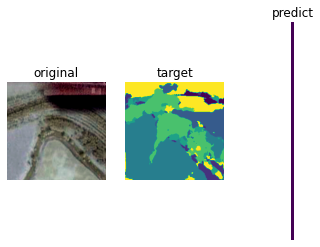

Train Epoch: 4 batch:2	Loss: -42.881676
tensor([[[0.5752],
         [0.5655],
         [0.5621],
         ...,
         [0.5655],
         [0.5746],
         [0.5861]],

        [[0.5554],
         [0.5363],
         [0.5249],
         ...,
         [0.5286],
         [0.5436],
         [0.5714]],

        [[0.5527],
         [0.5268],
         [0.5125],
         ...,
         [0.5176],
         [0.5346],
         [0.5678]],

        ...,

        [[0.5536],
         [0.5257],
         [0.5114],
         ...,
         [0.5169],
         [0.5345],
         [0.5676]],

        [[0.5595],
         [0.5355],
         [0.5252],
         ...,
         [0.5292],
         [0.5417],
         [0.5670]],

        [[0.5742],
         [0.5605],
         [0.5565],
         ...,
         [0.5580],
         [0.5619],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([1, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

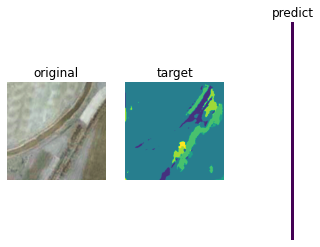

Train Epoch: 4 batch:3	Loss: -39.951553
tensor([[[0.5765],
         [0.5662],
         [0.5629],
         ...,
         [0.5653],
         [0.5744],
         [0.5860]],

        [[0.5563],
         [0.5356],
         [0.5246],
         ...,
         [0.5286],
         [0.5435],
         [0.5714]],

        [[0.5534],
         [0.5255],
         [0.5122],
         ...,
         [0.5178],
         [0.5346],
         [0.5678]],

        ...,

        [[0.5535],
         [0.5260],
         [0.5116],
         ...,
         [0.5174],
         [0.5349],
         [0.5674]],

        [[0.5594],
         [0.5357],
         [0.5253],
         ...,
         [0.5293],
         [0.5418],
         [0.5667]],

        [[0.5742],
         [0.5606],
         [0.5567],
         ...,
         [0.5585],
         [0.5623],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

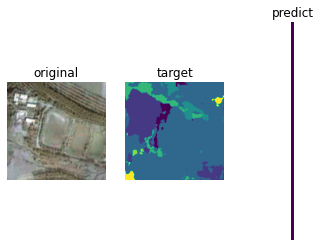

Train Epoch: 5 batch:0	Loss: -38.837940
tensor([[[0.5757],
         [0.5658],
         [0.5623],
         ...,
         [0.5658],
         [0.5748],
         [0.5863]],

        [[0.5557],
         [0.5361],
         [0.5245],
         ...,
         [0.5286],
         [0.5437],
         [0.5714]],

        [[0.5528],
         [0.5261],
         [0.5119],
         ...,
         [0.5173],
         [0.5346],
         [0.5678]],

        ...,

        [[0.5536],
         [0.5261],
         [0.5119],
         ...,
         [0.5169],
         [0.5346],
         [0.5675]],

        [[0.5594],
         [0.5359],
         [0.5256],
         ...,
         [0.5291],
         [0.5416],
         [0.5668]],

        [[0.5742],
         [0.5608],
         [0.5570],
         ...,
         [0.5581],
         [0.5619],
         [0.5778]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

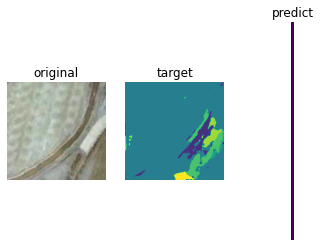

Train Epoch: 5 batch:1	Loss: -42.864666
tensor([[[0.5771],
         [0.5661],
         [0.5633],
         ...,
         [0.5660],
         [0.5750],
         [0.5864]],

        [[0.5570],
         [0.5352],
         [0.5249],
         ...,
         [0.5285],
         [0.5437],
         [0.5716]],

        [[0.5541],
         [0.5254],
         [0.5125],
         ...,
         [0.5172],
         [0.5346],
         [0.5680]],

        ...,

        [[0.5537],
         [0.5251],
         [0.5110],
         ...,
         [0.5173],
         [0.5349],
         [0.5674]],

        [[0.5601],
         [0.5352],
         [0.5250],
         ...,
         [0.5293],
         [0.5418],
         [0.5668]],

        [[0.5746],
         [0.5601],
         [0.5561],
         ...,
         [0.5583],
         [0.5621],
         [0.5778]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([3, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

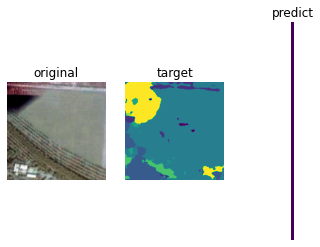

Train Epoch: 5 batch:2	Loss: -40.618160
tensor([[[0.5764],
         [0.5661],
         [0.5627],
         ...,
         [0.5663],
         [0.5752],
         [0.5866]],

        [[0.5563],
         [0.5356],
         [0.5244],
         ...,
         [0.5287],
         [0.5438],
         [0.5717]],

        [[0.5533],
         [0.5254],
         [0.5120],
         ...,
         [0.5172],
         [0.5346],
         [0.5681]],

        ...,

        [[0.5537],
         [0.5253],
         [0.5112],
         ...,
         [0.5170],
         [0.5345],
         [0.5676]],

        [[0.5599],
         [0.5352],
         [0.5249],
         ...,
         [0.5291],
         [0.5415],
         [0.5669]],

        [[0.5744],
         [0.5602],
         [0.5562],
         ...,
         [0.5580],
         [0.5618],
         [0.5777]]], grad_fn=<CopyBackwards>)
torch.Size([256, 256, 1])
torch.Size([1, 1, 256, 256])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        

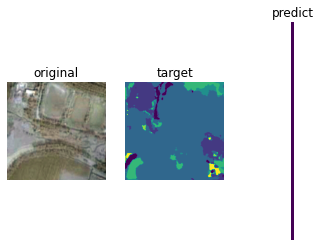

Train Epoch: 5 batch:3	Loss: -38.479332


In [ ]:
net.eval()

for epoch in range(1,5+1):
  for batch_idx, (data, targets ) in enumerate(dataloader_test):
          
          data = data.to(device)
          targets = targets.to(device)
          output = net(data)
          #print(targets.shape)
          #print(targets[0].shape)
          d = data[0].permute(1,2,0).cpu()
          t = targets[0].permute(1,2,0).cpu()
          o = output[0].permute(1,2,0).cpu()
          print(o)
          print(o.shape)
          print(targets.shape)
          o = torch.argmax(o, dim=0)
          print(o)

          COLORMAP = [[255,255,255],[0, 255, 0], [0, 0, 255], [0, 0, 255]]  # 分别为0-3类对应的颜色
          cm = np.array(COLORMAP).astype(np.uint8)
          o = cm[o]
          

          #o = output[0].permute(1,2,0).cpu().detach().numpy()
          plt.subplot(131),plt.imshow(d[ :, :,:].squeeze()),plt.title('original'),plt.axis('off')
          plt.subplot(132),plt.imshow(t[ :, :,:].squeeze()),plt.title('target'),plt.axis('off')
          plt.subplot(133),plt.imshow(o[ :, :,:].squeeze()),plt.title('predict'),plt.axis('off')
          plt.show()
          #print('output.shape:\n',o.shape)
          #print('output:\n',o)
          #print('targets.shape:\n',t.shape)
          #print('targets:\n',t)
          
          output = output.view(-1).float()
          targets = targets.view(-1).float()
          loss = ce_loss(output,targets)
          print('Train Epoch: {} batch:{}\tLoss: {:.6f}'.format(
              epoch, batch_idx , loss.item()))

In [ ]:
import torch
a = torch.rand(2,3)
print(a)
b = torch.argmax(a,dim=0)
print(b)

tensor([[0.2809, 0.5767, 0.4505],
        [0.9825, 0.8502, 0.2838]])
tensor([1, 1, 0])


In [ ]:
[R,G,B,224,224]
[labels,224,224]